## Multi feature predictions

In [ ]:
### importing the libraries
import pandas as pd
import numpy as np

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [3]:
### importing the functions from the src
from src.graphs.graphs_metrices import metrices, plot_predictions, plot_graphs_post_scaling

In [4]:
### loading the data
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [5]:
### creating the df_copy (for the comparison post scaling)
df_copy = df.copy()
df_copy.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [6]:
### taking the features ['close', 'high', 'low', 'open', 'volume']
features_to_target = ['close', 'high', 'low', 'open', 'volume']
features_to_target

['close', 'high', 'low', 'open', 'volume']

In [7]:
### scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df[features_to_target] = scaler.fit_transform(df[features_to_target])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,0.079550,0.061271,0.075349,0.067057,0.231933,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,0.056763,0.055386,0.056197,0.053718,0.282530,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,0.055938,0.037493,0.013047,0.028295,0.466678,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,0.052935,0.030656,0.036028,0.035353,0.309637,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,0.027263,0.035998,0.025914,0.033798,0.421773,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


feature : close


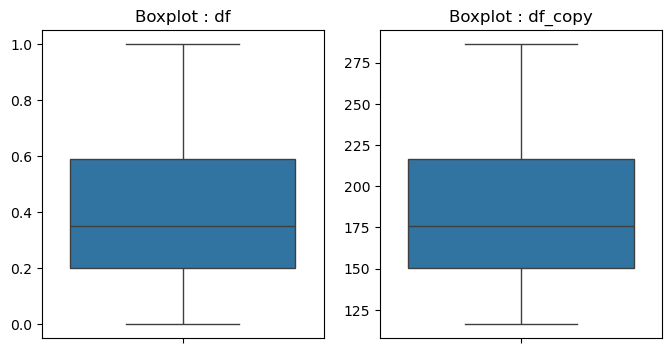

feature : high


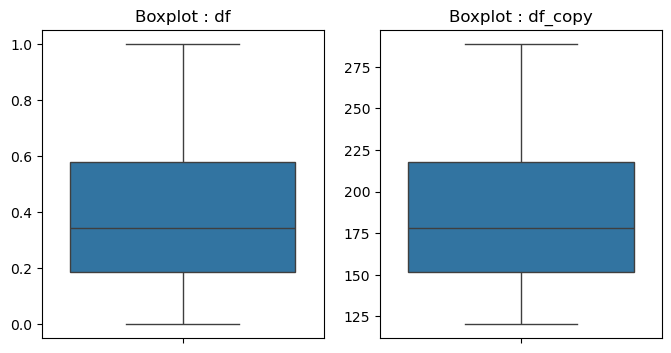

feature : low


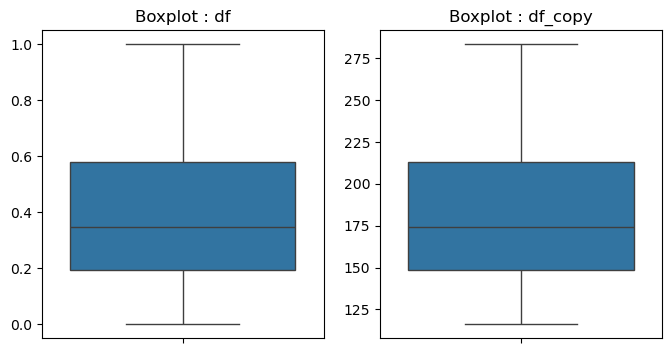

feature : open


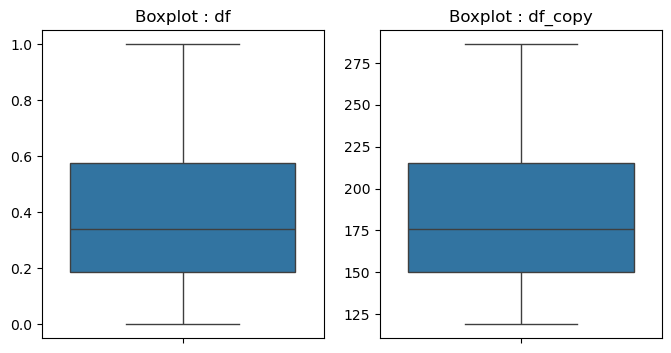

feature : volume


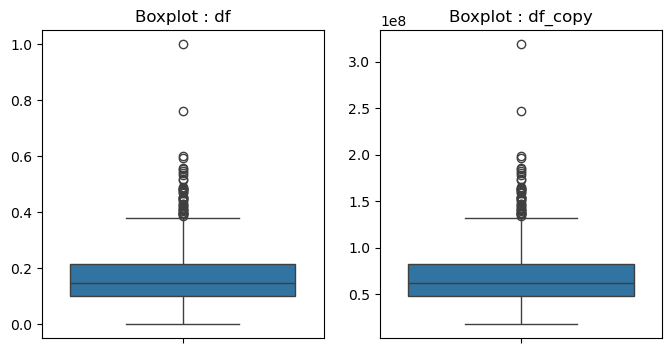

In [8]:
### plotting the graphs pre and post scaling
plot_graphs_post_scaling(df, df_copy, cols = features_to_target)

In [9]:
### making the sequences (we will be targeting the period of 90 days, and our feature is 'close')
X, y = [], []
days = 90
for i in range(len(df) - days) : 
    X.append(df[features_to_target][i : i + days])
    y.append(df[features_to_target[0]][i + days])

X = np.array(X)
y = np.array(y)

In [10]:
### checking the X
X

array([[[0.07955014, 0.06127149, 0.07534861, 0.06705749, 0.23193277],
        [0.05676264, 0.05538623, 0.05619726, 0.05371777, 0.28252998],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        ...,
        [0.10039451, 0.08463418, 0.10006583, 0.09224143, 0.16890162],
        [0.09862804, 0.08017565, 0.09934766, 0.08631932, 0.17579311],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022, 0.1469589 ]],

       [[0.05676264, 0.05538623, 0.05619726, 0.05371777, 0.28252998],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323, 0.30963707],
        ...,
        [0.09862804, 0.08017565, 0.09934766, 0.08631932, 0.17579311],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022, 0.1469589 ],
        [0.11758818, 0.09563189, 0.10856425, 0.09433511, 0.15508732]],

       [[0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323, 0.3

In [11]:
### checking the y
y

array([0.11758818, 0.12129777, 0.12312312, ..., 0.82093859, 0.86863334,
       0.87140081])

In [12]:
### veryfying the y, by checking the 91st to 93rd element of the 'close' in the 'df'
df['close'].iloc[90 : 94]

90    0.117588
91    0.121298
92    0.123123
93    0.138962
Name: close, dtype: float64

In [13]:
### checking the shape of the X and y
print(f"{X.shape} :: {y.shape}")

(1165, 90, 5) :: (1165,)


In [14]:
### reshaping the y
y = y.reshape(-1, 1)
y.shape

(1165, 1)

In [15]:
### creating the train and the test sequences (test size  = 80%)
test_size = int(len(df) * 0.80)
X_train, X_test = X[ : test_size], X[test_size : ]
y_train, y_test = y[: test_size], y[test_size : ]

In [16]:
### checking the shape of the train and test data
print(f"{X_train.shape} :: {y_train.shape} \n{X_test.shape} :: {y_test.shape}")

(1004, 90, 5) :: (1004, 1) 
(161, 90, 5) :: (161, 1)


In [17]:
### importing the libraries to create the model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [22]:
### creating the model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (days, 5)),
    Dropout(0.33),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(1, activation = 'linear')
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
### checking the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,201 (516.41 KB)

 Trainable params: 132,201 (516.41 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
### training the model
model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0358 - mse: 0.0358
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0051 - mse: 0.0051
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0040 - mse: 0.0040
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0031 - mse: 0.0031
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0032 - mse: 0.0032
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0029 - mse: 0.0029
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0031 - mse: 0.0031
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0027 - mse: 0.0027
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0028 - mse: 0.0028
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0031 - mse: 0.0031
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0023 - mse: 0.0023
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0025 - mse: 0.0025
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━

In [51]:
### y_pred 
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.49331975],
       [0.49398136],
       [0.49978322],
       [0.51017326],
       [0.52516305],
       [0.5362676 ],
       [0.54337955],
       [0.54660964],
       [0.5491828 ],
       [0.5508085 ],
       [0.54985774],
       [0.5479846 ],
       [0.54604584],
       [0.54445565],
       [0.5436716 ],
       [0.54485774],
       [0.54809034],
       [0.55201197],
       [0.55559343],
       [0.55900025],
       [0.56150836],
       [0.5606153 ],
       [0.5568218 ],
       [0.54816556],
       [0.53623456],
       [0.5262351 ],
       [0.5201485 ],
       [0.5169445 ],
       [0.52700007],
       [0.5441867 ],
       [0.56920385],
       [0.5940569 ],
       [0.6161595 ],
       [0.6352804 ],
       [0.6477217 ],
       [0.65593415],
       [0.65861166],
       [0.6558248 ],
       [0.6493535 ],
       [0.6425831 ],
       [0.63814795],
       [0.6334545 ],
       [0.6338874 ],
       [0.6370298 ],
       [0.6415106 ],
       [0.64249396],
       [0.6478028 ],
       [0.657

In [78]:
### dummies for y_pred
dummies_for_pred = np.zeros(shape = (len(y_pred), 5))
dummies_for_pred[:, 0] = y_pred.flatten()
dummies_for_pred

array([[0.49, 0.  , 0.  , 0.  , 0.  ],
       [0.49, 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.51, 0.  , 0.  , 0.  , 0.  ],
       [0.53, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.53, 0.  , 0.  ,

In [77]:
### dummies for y_test
dummies_for_test = np.zeros(shape = (len(y_test), 5))
dummies_for_test[:, 0] = y_test.flatten()
dummies_for_test

array([[0.52, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.58, 0.  , 0.  , 0.  , 0.  ],
       [0.58, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.  , 0.  , 0.  , 0.  ],
       [0.58, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.  ],
       [0.51, 0.  , 0.  , 0.  , 0.  ],
       [0.51, 0.  , 0.  , 0.  , 0.  ],
       [0.51, 0.  , 0.  ,

In [79]:
### inverse scaling the dummies and then updating the y_pred and y_test
dummies_for_test = scaler.inverse_transform(dummies_for_test)
dummies_for_pred = scaler.inverse_transform(dummies_for_pred)

In [80]:
### checking the dummies_for_test
dummies_for_test

array([[     205.17,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     207.82,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     212.44,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     213.55,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.95,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     210.01,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     211.14,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     212.41,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     211.16,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     208.62,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.11,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     210.16,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     210.02,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     211.18,      120.4 ,     

In [81]:
### dummies_for_pred
dummies_for_pred

array([[     200.14,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     200.25,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     201.24,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     203.  ,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     205.55,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     207.43,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     208.64,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.19,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.63,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.9 ,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.74,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.42,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     209.09,      120.4 ,      116.21,      119.03, 17910574.  ],
       [     208.82,      120.4 ,     

In [85]:
### restoring the values in y_pred
y_pred[:, 0] = dummies_for_pred[:, 0]
y_pred

array([[200.14],
       [200.25],
       [201.24],
       [203.  ],
       [205.55],
       [207.43],
       [208.64],
       [209.19],
       [209.63],
       [209.9 ],
       [209.74],
       [209.42],
       [209.09],
       [208.82],
       [208.69],
       [208.89],
       [209.44],
       [210.11],
       [210.72],
       [211.3 ],
       [211.72],
       [211.57],
       [210.93],
       [209.45],
       [207.43],
       [205.73],
       [204.7 ],
       [204.15],
       [205.86],
       [208.78],
       [213.03],
       [217.25],
       [221.  ],
       [224.25],
       [226.36],
       [227.76],
       [228.21],
       [227.74],
       [226.64],
       [225.49],
       [224.74],
       [223.94],
       [224.01],
       [224.55],
       [225.31],
       [225.47],
       [226.38],
       [228.03],
       [229.75],
       [231.06],
       [231.25],
       [229.77],
       [228.41],
       [227.65],
       [228.21],
       [229.02],
       [230.32],
       [231.49],
       [231.32

In [86]:
### restoring the values in y_test
y_test[:, 0] = dummies_for_test[:, 0]
y_test

array([[205.17],
       [207.82],
       [212.44],
       [213.55],
       [209.95],
       [210.01],
       [211.14],
       [212.41],
       [211.16],
       [208.62],
       [209.11],
       [210.16],
       [210.02],
       [211.18],
       [212.48],
       [214.4 ],
       [214.15],
       [213.76],
       [213.88],
       [214.05],
       [211.27],
       [209.05],
       [207.57],
       [202.38],
       [203.35],
       [202.92],
       [213.25],
       [220.03],
       [229.35],
       [227.18],
       [229.65],
       [233.33],
       [232.78],
       [231.59],
       [230.89],
       [230.56],
       [226.01],
       [224.9 ],
       [227.76],
       [227.16],
       [229.31],
       [230.49],
       [232.56],
       [232.14],
       [229.72],
       [238.47],
       [239.78],
       [239.69],
       [237.88],
       [234.35],
       [226.79],
       [230.03],
       [234.07],
       [236.7 ],
       [238.15],
       [238.99],
       [237.88],
       [245.5 ],
       [256.08

MAE : 9.023223179408483
MSE : 113.45952711446873
RMSE : 10.6517382203314


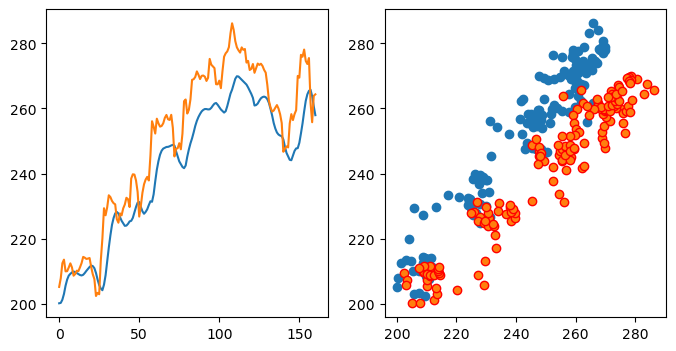

In [87]:
### plotting the metrices and graphs
metrices(y_test, y_pred)
plot_predictions(y_test, y_pred)